In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.9 MB/s eta 0:00:00




# Visualize source leakage among labels using a circular graph

This example computes all-to-all pairwise leakage among 68 regions in
source space based on MNE inverse solutions and a FreeSurfer cortical
parcellation. Label-to-label leakage is estimated as the correlation among the
labels' point-spread functions (PSFs). It is visualized using a circular graph
which is ordered based on the locations of the regions in the axial plane.


In [ ]:
# Authors: Olaf Hauk <olaf.hauk@mrc-cbu.cam.ac.uk>
#          Martin Luessi <mluessi@nmr.mgh.harvard.edu>
#          Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Nicolas P. Rougier (graph code borrowed from his matplotlib gallery)
#
# License: BSD-3-Clause

In [2]:
!pip install mne-connectivity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 KB 3.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import mne
from mne.datasets import sample
from mne.minimum_norm import (read_inverse_operator,
                              make_inverse_resolution_matrix,
                              get_point_spread)

from mne.viz import circular_layout
from mne_connectivity.viz import plot_connectivity_circle


print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os. getcwd()

'/content'

In [6]:
path_root = '/content/gdrive/MyDrive/sleep-staging-database/haaglanden-medisch-centrum-sleep-staging-database-1.0.1/recordings'

In [7]:
import os
os.chdir(path_root)

In [8]:
import os
os. getcwd()

'/content/gdrive/MyDrive/sleep-staging-database/haaglanden-medisch-centrum-sleep-staging-database-1.0.1/recordings'

In [9]:
data=glob(path_root + '/*.edf')
print(len(data))

308


In [10]:
data_eeg = [i for i in data if 'S' and not 'sleepscoring' in i.split('/content/gdrive/MyDrive/sleep-staging-database/haaglanden-medisch-centrum-sleep-staging-database-1.0.1/recordings')[1]]

In [11]:
data_ano = [i for i in data if 'S'and 'sleepscoring' in i.split('/content/gdrive/MyDrive/sleep-staging-database/haaglanden-medisch-centrum-sleep-staging-database-1.0.1/recordings')[1]]

In [12]:
dictionary={}
for i,eeg in enumerate(data_eeg):
  dictionary[i+1]=[eeg]
for i,ano in enumerate(data_ano):
  dictionary[i+1].append(ano)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

YAHYA, BELLO = 0, 1
[yahya_files, bello_files] = dictionary[3], dictionary[65]
raw = mne.io.read_raw_edf(yahya_files[0], stim_channel='Event marker',
                                misc=['Temp rectal'])
annot_train = mne.read_annotations(yahya_files[1])
raw.set_annotations(annot_train, emit_warning=False)

# # Extract the EEG data and metadata from the Raw object
# eeg_data = raw.get_data()
# sfreq = raw.info['sfreq']
# channels = raw.info['ch_names']

# # Calculate the average voltage for each epoch
# def calculate_erp(epochs):
#     erp = np.mean(epochs, axis=0)
#     return erp

# # Calculate the ERP for each epoch
# erp = calculate_erp(eeg_data)

# # Plot the ERP
# plt.plot(erp)
# plt.xlabel('Time (ms)')
# plt.ylabel('Voltage (uV)')
# plt.title('Event-Related Potential (ERP)')
# plt.show()

Extracting EDF parameters from /content/gdrive/MyDrive/sleep-staging-database/haaglanden-medisch-centrum-sleep-staging-database-1.0.1/recordings/SN003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SN003.edf, 8 x 7330816 (28636.0 s), ~13 kB, data not loaded>

**Method 1 for ERP Analysis**

Reading 0 ... 7330815  =      0.000 ... 28635.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


Used Annotations descriptions: ['Lights off@@SaO2', 'Lights on@@SaO2', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W']
Not setting metadata
401 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 401 events and 257 original time points ...


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s finished


0 bad epochs dropped


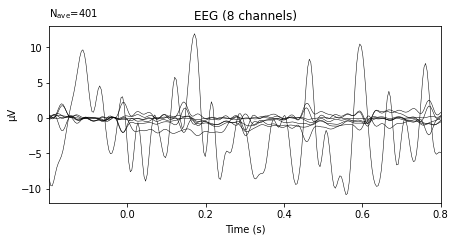

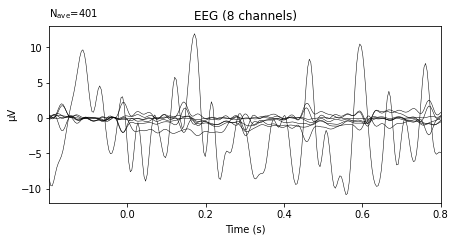

In [33]:
# Select a single channel and apply a bandpass filter
#raw.pick_channels(['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2'])
raw.load_data()
raw.filter(l_freq=1, h_freq=30)

# Epoch the data based on events
event_id = {'Sleep stage W': 1,
            'Sleep stage N1': 2,
            'Sleep stage N2': 3,
             'Sleep stage N3': 4,
             'Sleep stage R': 5}
events, _ = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.8, preload=True)

# Calculate the average ERP for each condition
evoked = epochs.average()

# Plot the grand-average ERP
evoked.plot()

In [15]:
evoked

<Evoked | '0.00 × Sleep stage W + 0.00 × Sleep stage N1 + 0.20 × Sleep stage N2 + 0.42 × Sleep stage N3 + 0.37 × Sleep stage R' (average, N=401), -0.19922 – 0.80078 sec, baseline -0.199219 – 0 sec, 8 ch, ~29 kB>

**Methode 2 for ERP Analysis**

Used Annotations descriptions: ['Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W']


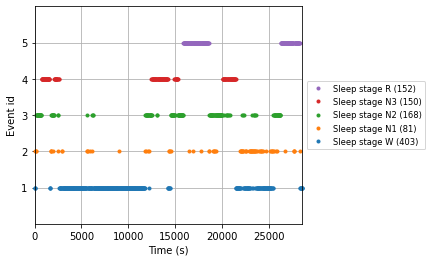

In [19]:
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage N1': 2,
                              'Sleep stage N2': 3,
                              'Sleep stage N3': 4,
                              'Sleep stage R': 5}

# keep last 30-min wake events before sleep and first 30-min wake events after
# sleep and redefine annotations on raw data
annot_train.crop(annot_train[1]['onset'] - 30 * 60,
                 annot_train[-2]['onset'] + 30 * 60)
raw.set_annotations(annot_train, emit_warning=False)

events_train, _ = mne.events_from_annotations(
       raw, event_id=annotation_desc_2_event_id, chunk_duration=20.)

# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage N1': 2,
            'Sleep stage N2': 3,
             'Sleep stage N3': 4,
             'Sleep stage R': 5}

# plot events
fig = mne.viz.plot_events(events_train, event_id=event_id,
                          sfreq=raw.info['sfreq'],
                          first_samp=events_train[0, 0],on_missing='warn')

# keep the color-code for further plotting
stage_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [20]:
events_train

array([[      0,       0,       1],
       [   7680,       0,       1],
       [  15360,       0,       1],
       ...,
       [7303680,       0,       1],
       [7311360,       0,       1],
       [7319040,       0,       1]])

In [16]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG F4-M1, EEG C4-M1, EEG O2-M1, EEG C3-M2, EMG chin, EOG E1-M2, ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2001-01-01 23:42:30 UTC
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>

In [21]:
event_dict = {'Sleep stage W':1, 'Sleep stage N1':2, 'Sleep stage N2':3, 'Sleep stage N3':4, 'Sleep stage R':5}
epochs = mne.Epochs(raw, events_train, event_id=event_dict, tmin=-0.3, tmax=0.7,
                    preload=True)

Not setting metadata
954 matching events found
Setting baseline interval to [-0.30078125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 954 events and 257 original time points ...
1 bad epochs dropped


In [22]:
epochs

Number of events,953
Events,Sleep stage N1: 81Sleep stage N2: 168Sleep stage N3: 150Sleep stage R: 152Sleep stage W: 402
Time range,-0.301 – 0.699 sec
Baseline,-0.301 – 0.000 sec


In [26]:
l_aud = epochs['Sleep stage W'].average()
l_vis = epochs['Sleep stage R'].average()


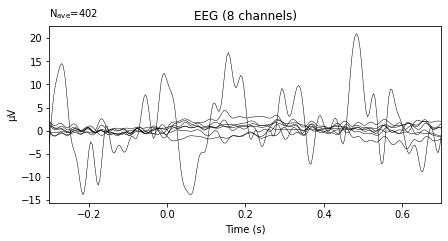

<ipython-input-28-6765543a3b9c>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig2 = l_vis.plot(spatial_colors=True)


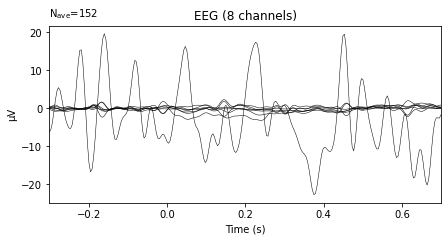

In [28]:
fig1 = l_aud.plot()
fig2 = l_vis.plot(spatial_colors=True)

No projector specified for this dataset. Please consider the method self.add_proj.


<ipython-input-29-f9b8fab73254>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  l_aud.plot_joint()


RuntimeError: ignored

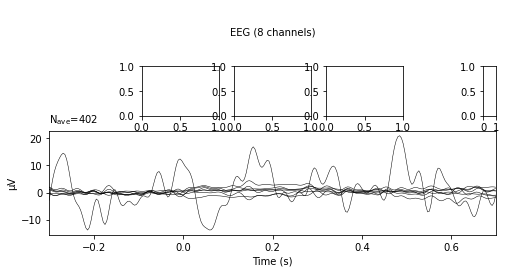

In [29]:
l_aud.plot_joint()

In [31]:
# import mne
# from mne_connectivity import spectral_connectivity_epochs
# # Load the EEG data
# #raw = mne.io.read_raw_edf('eeg_data.edf', preload=True)
# YAHYA, BELLO = 0, 1
# [yahya_files, bello_files] = dictionary[2], dictionary[65]
# raw = mne.io.read_raw_edf(yahya_files[0], stim_channel='Event marker',
#                                 misc=['Temp rectal'])
# annot_train = mne.read_annotations(yahya_files[1])
# raw.set_annotations(annot_train, emit_warning=False)

# # Select the channels of interest
# ch_1 = raw.ch_names.index('EEG F4-M1')
# ch_2 = raw.ch_names.index('EEG C4-M1')

# # Compute the coherence between the two channels
# n_epo = 5
# fmin = 1  # Minimum frequency of interest (in Hz)
# fmax = 40  # Maximum frequency of interest (in Hz)
# tmin = 0  # Start time (in seconds)
# tmax = raw.times[-1]  # End time (in seconds)
# coh, freqs, times,n_epo, _, _ = spectral_connectivity_epochs(
#      epochs, method='coh', indices=[ch_1, ch_2], sfreq=raw.info['sfreq'],
#     fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax
# )

# # Plot the results
# import matplotlib.pyplot as plt
# plt.imshow(coh, vmin=0, vmax=1, origin='lower',
#            extent=[times[0], times[-1], fmin, fmax],
#            cmap='RdBu_r', aspect='auto')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.colorbar()
# plt.show()


In [ ]:
print(raw.ch_names)

['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2', 'EMG chin', 'EOG E1-M2', 'EOG E2-M2', 'ECG']
